In [28]:
import numpy as np
from PIL import Image
from scipy import misc
import matplotlib.pyplot as plt

from utils import *

In [17]:
def convert2bw(filename, result):
    image_file = Image.open(filename) # open colour image
    image_file = image_file.convert('L') # convert image to black and white
    image_file.save(result)

In [2]:
"""
DSP_UINT8   = 0, ///< int8_t
DSP_INT16   = 1, ///< int16_t
DSP_INT32   = 2, ///< int32_t
DSP_FLOAT32 = 3, ///< float
DSP_FLOAT64 = 4  ///< double
"""
def type_map(dtype):
    if dtype == np.int8:
        return 0
    if dtype == np.uint8:
        return 1
    if dtype == np.int16:
        return 2
    if dtype == np.int32:
        return 3
    if dtype == np.float32:
        return 4
    if dtype == np.float64:
        return 5

In [24]:
convert2bw("../data/4.1.04.tiff", "../data/female.png")
convert2bw("../data/kodim09.png", "../data/sail.png")

In [25]:
female = misc.imread("../data/female.png")
sail = misc.imread("../data/sail.png")

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


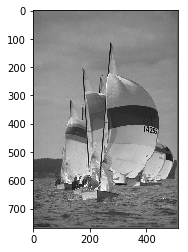

In [26]:
plt.imshow(sail, cmap='gray', vmin=0, vmax=255)
plt.show()

In [29]:
dump_signal("../data/im_female.bin", female, np.uint8)
dump_signal("../data/im_sail.bin", sail, np.uint8)

In [137]:
laplace = np.asarray([[0, 1, 0], [1,-4, 1], [0, 1, 0]])
laplace = laplace
gauss = np.asarray(
    [[1, 4, 7, 4, 1],
    [4, 16, 26, 16, 4],
    [7, 26, 41, 26, 7],
    [4, 16, 26, 16, 4],
    [1, 4, 7, 4, 1]],
    dtype=np.int8
)

In [47]:
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

In [132]:
gauss = np.int8(255 * matlab_style_gauss2D((5, 5), sigma=4.0))

In [133]:
gauss

array([[ 8,  9, 10,  9,  8],
       [ 9, 10, 11, 10,  9],
       [10, 11, 11, 11, 10],
       [ 9, 10, 11, 10,  9],
       [ 8,  9, 10,  9,  8]], dtype=int8)

In [134]:
dump_signal("../data/laplace_2D.bin", laplace, np.int8)
dump_signal("../data/gauss_2D.bin", gauss, np.int8)

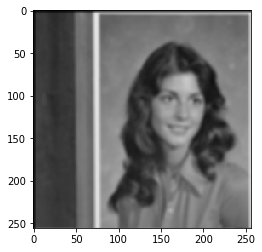

In [145]:
res = read_signal("../data/fim_female.bin", dtype=np.uint8)
plt.imshow(res, cmap='gray', vmin=0, vmax=255)
plt.show()

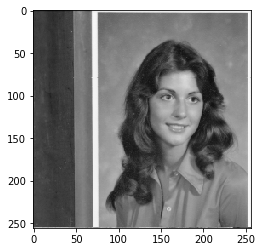

In [146]:
plt.imshow(female, cmap='gray', vmin=0, vmax=255)
plt.show()